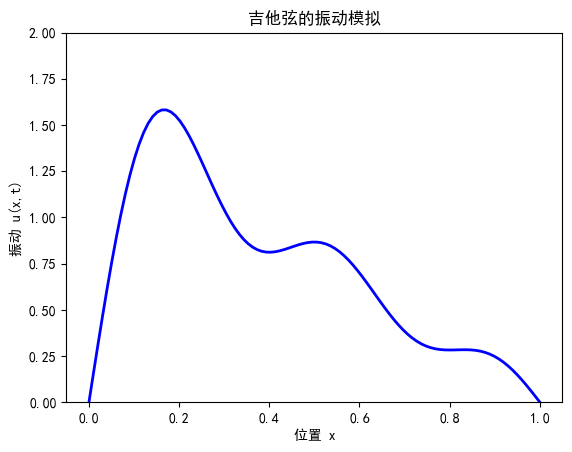

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 基本参数
L = 1.0  # 弦长（归一化到 1）
v = 1.0  # 传播速度
T = 2.0  # 模拟时间
frames = 100  # 动画帧数
n_modes = 5  # 叠加的泛音数量

plt.rcParams['font.family'] = 'SimHei'

# 时间和空间离散化
x = np.linspace(0, L, 100)  # 100 个位置点
t = np.linspace(0, T, frames)  # 100 个时间点

# 计算振动模式
def guitar_string_vibration(x, t, n_modes=5):
    u = np.zeros_like(x)
    for n in range(1, n_modes + 1):
        A_n = 1 / n  # 振幅按 1/n 衰减，模拟物理上的泛音衰减
        omega_n = n * np.pi * v / L  # 角频率
        u += A_n * np.cos(omega_n * t) * np.sin(n * np.pi * x / L)
    return u

# 初始化动画
fig, ax = plt.subplots()
line, = ax.plot(x, guitar_string_vibration(x, 0, n_modes), 'b-', lw=2)
ax.set_ylim(0, 2)
ax.set_xlabel("位置 x")
ax.set_ylabel("振动 u(x,t)")
ax.set_title("吉他弦的振动模拟")

# 更新函数
def update(frame):
    u = guitar_string_vibration(x, t[frame], n_modes)
    line.set_ydata(u)
    return line,

# 生成动画
ani = animation.FuncAnimation(fig, update, frames=frames, interval=30, blit=True)

plt.show()


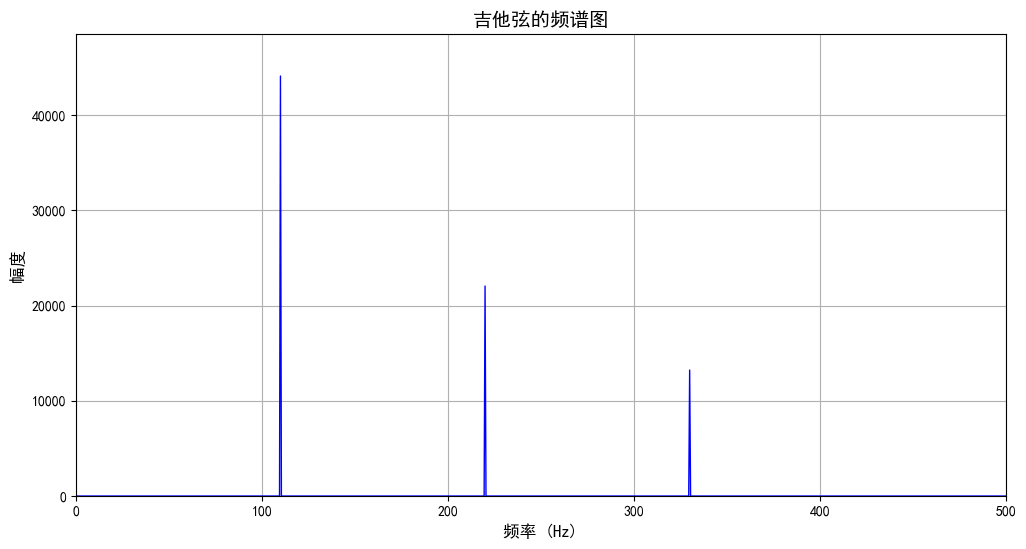

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 1. 设定参数
fs = 44100  # 采样率（Hz），常见音频标准
T = 2.0     # 采样时长（秒）
N = int(fs * T)  # 采样点数
t = np.linspace(0, T, N, endpoint=False)  # 时间数组

# 2. 生成吉他弦振动信号（基频 + 一些泛音）
f1 = 110  # A弦基频 (Hz)
f2 = 220  # 第一泛音 (Hz)
f3 = 330  # 第二泛音 (Hz)

signal = (np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t) + 0.3*np.sin(2*np.pi*f3*t))

# 3. 计算 FFT 并获取频谱
fft_result = fft(signal)  # 快速傅里叶变换
freqs = fftfreq(N, 1/fs)  # 计算对应的频率
magnitude = np.abs(fft_result)  # 取幅度谱

# 4. 画出幅度谱
plt.figure(figsize=(12, 6))  # 调整图形大小
plt.plot(freqs[:N//2], magnitude[:N//2], color='blue', linestyle='-', linewidth=1)  # 设置线条颜色、样式和宽度
plt.xlabel("频率 (Hz)", fontsize=12)  # 调整字体大小
plt.ylabel("幅度", fontsize=12)  # 调整字体大小
plt.title("吉他弦的频谱图", fontsize=14)  # 调整字体大小
plt.grid(True)  # 添加网格线
plt.xlim(0, 500)  # 设置x轴范围
plt.ylim(0, np.max(magnitude[:N//2]) * 1.1)  # 设置y轴范围
plt.show()

